<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>

# Challenge S3: Prophet 
# Personas que ven un escaparate de una tienda

Una cadena de retail está interesada en realizar una previsión de las personas que ven el escaparate de su tienda ya que es una variable que afecta directamente a las ventas de la tienda. Durante dos años ha generado un histórico diario de personas que se han parado a ver el escaparate de una tienda céntrica de Madrid, colocando un dispositivo de IoT que detecta el número de personas que se paran en una tienda y deciden que sólo si la persona permanece más de 3 segundos parado en frente del escaparate se contará como persona que ha visto el escaparate.

Nos piden realizar una previsión para el próximo año a los datos históricos que tenemos.

Nuestro objetivo es:
1. Cargar las ventas en un DataFrame (tenemos un csv con los datos de partida: personas_escaparate.csv)
2. Preparar el DataFrame para cargar en un modelo que asumiremos como ADITIVO en Prophet.
3. Ajustar el modelo.
4. Analizar las previsiones y errores.
5. Mejorar nuestro modelo de previsión incluyendo algún evento especial.

In [1]:
import sys
!{sys.executable} -m pip install fbprophet

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## 1. Cargar las ventas en un DataFrame

In [3]:
df_datos = pd.read_csv('personas_escaparate.csv')

In [4]:
df_datos.describe()

,valor
count,731.000000
mean,3434.804378
std,654.027471
min,2313.000000
25%,2999.500000
50%,3374.000000
75%,3800.000000
max,6719.000000


In [5]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
fecha    731 non-null object
valor    731 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


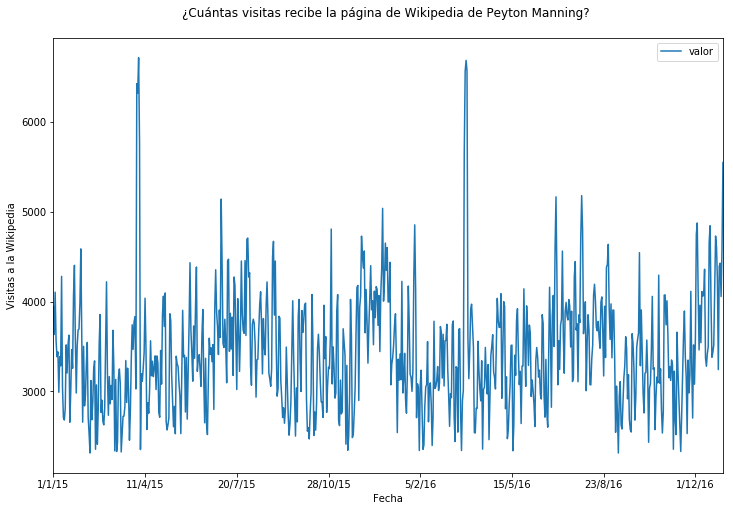

In [6]:
## Representamos nuestra serie temporal
ax = df_datos[:800].set_index('fecha').plot(figsize = (12, 8),
                                      title = '¿Cuántas visitas recibe la página de Wikipedia de Peyton Manning? \n')
ax.set_ylabel('Visitas a la Wikipedia')
ax.set_xlabel('Fecha')

plt.show()

## 2. Preparar el DataFrame para cargar en un modelo Prophet.

In [7]:
df_datos['fecha']=pd.to_datetime(df_datos['fecha'])
df_datos.head()

,fecha,valor
0,2015-01-01,3947
1,2015-02-01,3634
2,2015-03-01,4105
3,2015-04-01,3564
4,2015-05-01,3387


In [8]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
fecha    731 non-null datetime64[ns]
valor    731 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [9]:
df_datos = df_datos.rename(columns ={'fecha':'ds', 'valor':'y'})

## 3. Ajustar el modelo

In [10]:
modelo = Prophet()
modelo.fit(df_datos)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## 4. Analizar las previsiones y errores.

In [11]:
futuro = modelo.make_future_dataframe(periods=365)

In [12]:
prevision = modelo.predict(futuro)

Visualización de las componentes de la serie

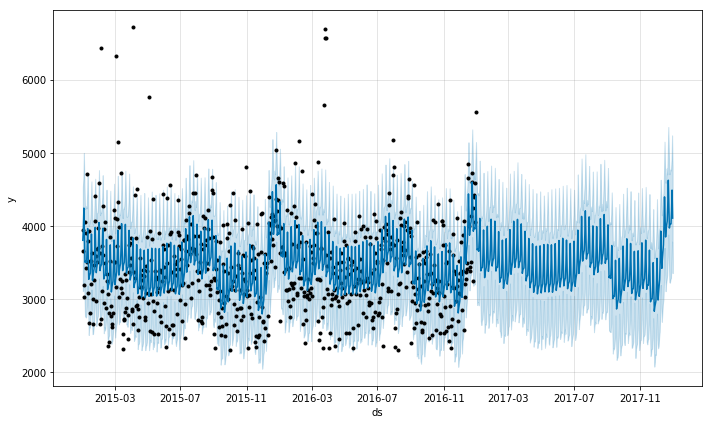

In [13]:
modelo.plot(prevision);

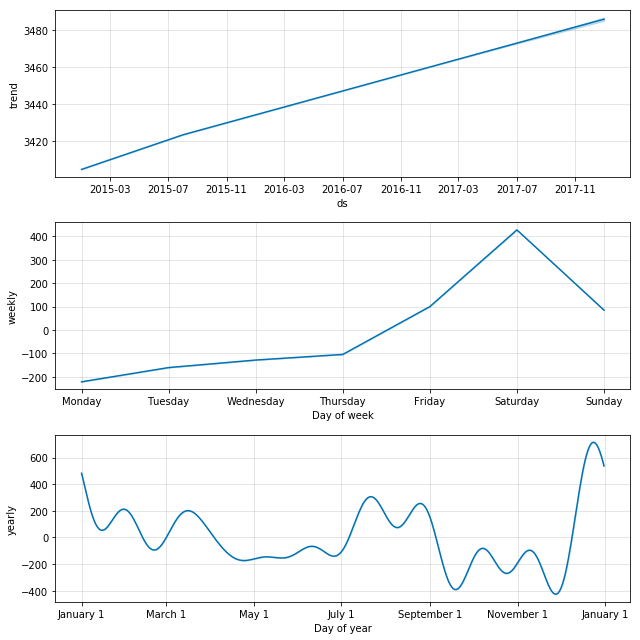

In [14]:
modelo.plot_components(prevision, weekly_start = 1);

### ¿qué podríamos incluir para mejorar nuestro modelo? ¿dónde nos equivocamos especialmente?

Se puede observar que las amplitudes y la tendencia se mantienen en la predicción, mientras que el principal error aparece en los valores extremos/outliers cuando hay muchas visitas al acabar el primer cuarto de año.

Se podrian incluir valores en la entrada de entrenamiento que sean mas alto en las areas del mes Marzo-Abril. El evento especial puede ser las vacaciones de Semana Santa.

## 5. Mejorar nuestro modelo de previsión incluyendo algún evento especial.

In [15]:
dias = pd.DataFrame({
  'holiday': 'easter',
  'ds': pd.to_datetime(['2015-03-29', '2015-03-30', '2015-03-31', 
                        '2015-04-01', '2015-04-02', '2015-04-03',
                        '2015-03-01', '2015-03-02', '2015-03-03', 
                        '2016-03-20', '2016-03-21', '2016-03-22', 
                        '2016-03-23', '2016-03-24', '2016-03-25',
                        '2017-04-09', '2017-04-10', '2017-04-11',
                        '2017-04-12', '2017-04-13', '2017-04-14',
                        '2017-04-15', '2017-04-16']),
  'lower_window': 0,
  'upper_window': 1,
})

dias

,holiday,ds,lower_window,upper_window
0,easter,2015-03-29,0,1
1,easter,2015-03-30,0,1
2,easter,2015-03-31,0,1
3,easter,2015-04-01,0,1
4,easter,2015-04-02,0,1
5,easter,2015-04-03,0,1
6,easter,2015-03-01,0,1
7,easter,2015-03-02,0,1
8,easter,2015-03-03,0,1
9,easter,2016-03-20,0,1


In [16]:
#easter = easter.reset_index()  # THE FIX
modelo_mejora = Prophet(holidays=dias, daily_seasonality=True)
prevision2 = modelo_mejora.fit(df_datos).predict(futuro)

Comparativa de ambos modelos

Text(0.5, 1.0, 'Modelo con Marzo-Abril')

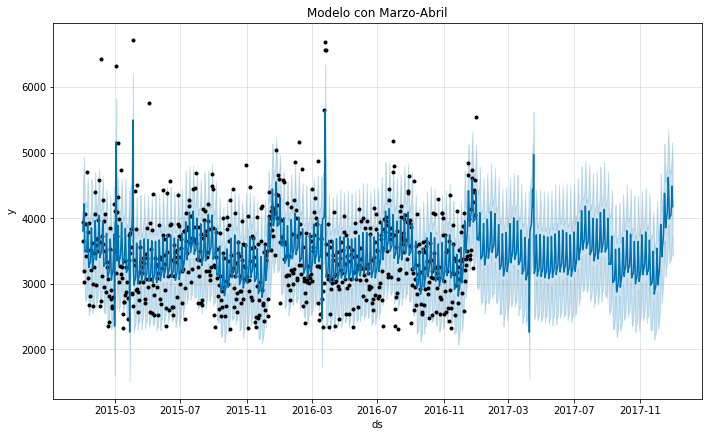

In [17]:
#Modelo tras aplicar los días de semana santa
modelo_mejora.plot(prevision2);
plt.title('Modelo con Marzo-Abril')

Text(0.5, 1.0, 'Modelo inicial')

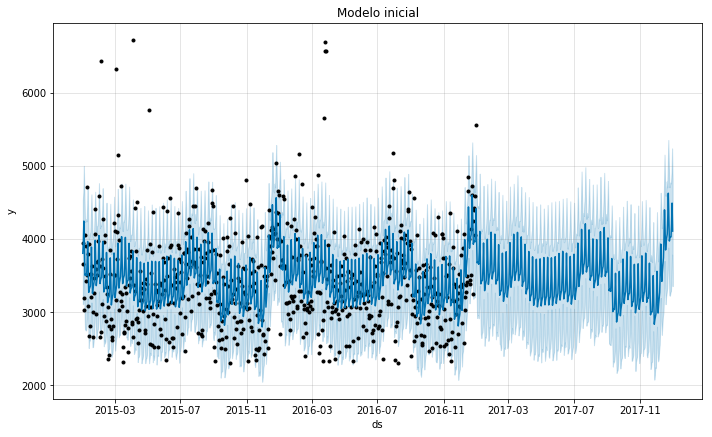

In [18]:
modelo.plot(prevision);
plt.title('Modelo inicial')